# PCA and eigendisposition

## 1.2 Generate bi-variate normal random numbers

In this segment, i will generate 100 random values from the same multivariate normal distribution and create 100 samples.

One thing that is important to note is that the values that are going to be generated in this assignment are going to be different then those in MATLAB because of how the RNG (Random Number Generator) works under the hood. Even if we have a fixed seed like in the example, it will be almost impossible to get the same sample as the example because we can not know for certain what `rng('default')` does in MATLAB.

Even though the sample is different, we will still be able to eyeball the outputs we get and kind of know if its correct or not. And as we can see we got fairly close to the output given in the example.

In [68]:
# import all dependencies and libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sympy as sp


Cov matrix: 
[[2.  1.5]
 [1.5 4. ]]


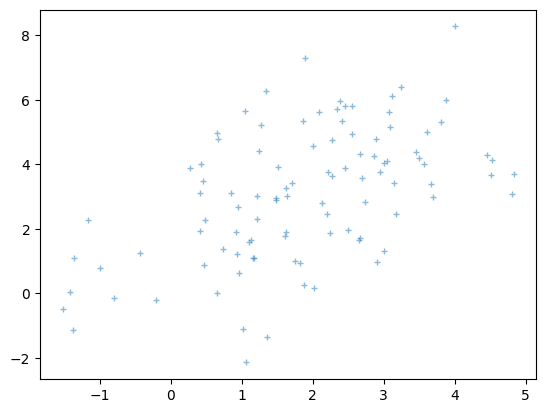

In [69]:
mu = [2, 3]
cov = [[2, 1.5], [1.5, 4]]

np.random.seed(0)

samples = np.random.multivariate_normal(mu, cov, 100) # generate 100 samples

print("Cov matrix: ")
print(np.array(cov))

plt.plot(samples[:, 0], samples[:, 1], '+', markersize=5, alpha=0.5)
plt.show()

In [70]:
sample_cov = np.cov(samples, rowvar=False)
print("Sample Covariance Matrix:")
print(sample_cov)

# Compute the sample correlation coefficient matrix.
# Again specify rowvar=False since each column represents a variable.
sample_corr = np.corrcoef(samples, rowvar=False)
print("\nSample Correlation Matrix:")
print(sample_corr)

Sample Covariance Matrix:
[[2.04790519 1.5552366 ]
 [1.5552366  4.26664226]]

Sample Correlation Matrix:
[[1.        0.5261365]
 [0.5261365 1.       ]]


In [71]:
# Pearson correlation coefficient: Cov(X, Y) / (sqrt(Var(X))*sqrt(Var(Y)))
r_manual = 1.5552366 / (np.sqrt(2.04790519 * 4.26664226))
print("\nManually computed Pearson correlation coefficient:")
print(r_manual)


Manually computed Pearson correlation coefficient:
0.5261364976639781


## 1.3. Perform PCA on the bi-variate normal random numbers

We can now perform PCA on the sample that we produced in the last step segment.

In [72]:
# intialize pca and get scores
pca = PCA(n_components=2)
scores = pca.fit_transform(samples)

# loading_vector: principal component loadings (each column is a component)
loading_vector = pca.components_.T

variability_explained = pca.explained_variance_ratio_ * 100

print("Loading Vectors (Principal Components):")
print(loading_vector)
print("\nVariability Explained (in %):")
print(variability_explained)


Loading Vectors (Principal Components):
[[ 0.45786841  0.88901998]
 [ 0.88901998 -0.45786841]]

Variability Explained (in %):
[80.2532502 19.7467498]


In [73]:
score_corr = np.corrcoef(scores, rowvar=False)
print("\nCorrelation Coefficient Matrix of Scores:")
print(score_corr)


Correlation Coefficient Matrix of Scores:
[[1.00000000e+00 6.44712243e-16]
 [6.44712243e-16 1.00000000e+00]]


In [74]:
norm_pc1 = np.linalg.norm(loading_vector[:, 0])
norm_pc2 = np.linalg.norm(loading_vector[:, 1])
dot_product = np.dot(loading_vector[:, 0], loading_vector[:, 1])

print("\nNorm of loading vector 1:", norm_pc1)
print("Norm of loading vector 2:", norm_pc2)
print("Dot product of the two loading vectors:", dot_product)


Norm of loading vector 1: 0.9999999999999999
Norm of loading vector 2: 0.9999999999999999
Dot product of the two loading vectors: 0.0


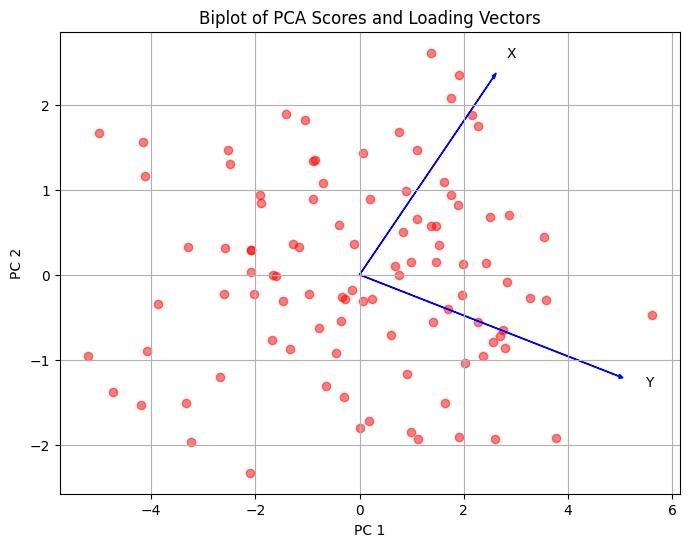

In [75]:
plt.figure(figsize=(8, 6))
# Plot the PCA scores (the projected data)
plt.scatter(scores[:, 0], scores[:, 1], c='r', alpha=0.5, label="Scores")

# Choose scaling factors for the loading vectors so they are visible.
# We use the maximum absolute value of the scores to scale the arrows.
scalex = np.max(np.abs(scores[:, 0]))
scaley = np.max(np.abs(scores[:, 1]))

# Define styling for the loading vectors
labels = ['X', 'Y']

for i in range(loading_vector.shape[0]):
    plt.arrow(0, 0, loading_vector[i, 0] * scalex, loading_vector[i, 1] * scaley, color='b', width=0.005, head_width=0.05)
    plt.text(loading_vector[i, 0] * scalex * 1.1, loading_vector[i, 1] * scaley * 1.1, labels[i],
              color='black')

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("Biplot of PCA Scores and Loading Vectors")
plt.grid(True)
plt.show()

## 1.4. Perform PCA step by step

In chapter 1.3, i used a built in PCA class from sklearn to plot the principal components but in this chapter i will compute it manually. I will use the same formulas as in the example for my computations.

In [76]:
# 1.4.1 Standardize the Data (Compute z-scores)
mean_vals = np.mean(samples, axis=0)
std_vals = np.std(samples, axis=0, ddof=1)

# print for debug
print("Means:", mean_vals)
print("Standard Deviations:", std_vals)

# Standardize each variable (z-score transformation)
data_standardized = np.empty_like(samples)
data_standardized[:, 0] = (samples[:, 0] - mean_vals[0]) / std_vals[0]
data_standardized[:, 1] = (samples[:, 1] - mean_vals[1]) / std_vals[1]

Means: [1.86325053 3.07556654]
Standard Deviations: [1.43105038 2.06558521]


In [77]:
# 1.4.2 Compute the Covariance Matrix of the Standardized Data

# Since the data is standardized, the variances along the diagonal should be 1.
cov_standardized = np.cov(data_standardized, rowvar=False)
print("\nCovariance matrix of standardized data:")
print(cov_standardized)


Covariance matrix of standardized data:
[[1.        0.5261365]
 [0.5261365 1.       ]]


In [78]:
# 1.4.3 find eigenvalues and eigenvectors

# Given standardized covariance matrix (as in the example)
Cov = np.array([[1.0000, 0.5261365],
                [0.5261365, 1.0000]])

eigen_vals, eigen_vecs = np.linalg.eig(Cov)
sorted_indices = np.argsort(eigen_vals)  # sort in ascending order
eigen_vals_sorted = eigen_vals[sorted_indices]
eigen_vecs_sorted = eigen_vecs[:, sorted_indices]

loading_vector = np.round(eigen_vecs_sorted, 4) # Round to 4 decimals for display
lambda_matrix = np.diag(np.round(eigen_vals_sorted, 4))

# Display results similar to MATLAB output:
print("loading_vector =")
print(loading_vector)
print("\nlambda =")
print(lambda_matrix)

# ------------------------------------------------------------------
# Check if Cov*v = lambda*v for each eigenvector
check1 = np.dot(Cov, loading_vector[:, 0]) - lambda_matrix[0, 0] * loading_vector[:, 0]
check2 = np.dot(Cov, loading_vector[:, 1]) - lambda_matrix[1, 1] * loading_vector[:, 1]
print("\nCov*loading_vector(:,1) - lambda(1,1)*loading_vector(:,1) =")
print(np.round(check1, 4))
print("\nCov*loading_vector(:,2) - lambda(2,2)*loading_vector(:,2) =")
print(np.round(check2, 4))

# Verify eigenvectors are unit vectors and orthogonal:
norm1 = np.linalg.norm(loading_vector[:, 0])
norm2 = np.linalg.norm(loading_vector[:, 1])
dot_prod = np.dot(loading_vector[:, 0], loading_vector[:, 1])
print("\nnorm(loading_vector(:,1)) =")
print(np.round(norm1, 4))
print("norm(loading_vector(:,2)) =")
print(np.round(norm2, 4))
print("dot(loading_vector(:,1), loading_vector(:,2)) =")
print(np.round(dot_prod, 4))


loading_vector =
[[-0.7071  0.7071]
 [ 0.7071  0.7071]]

lambda =
[[0.4739 0.    ]
 [0.     1.5261]]

Cov*loading_vector(:,1) - lambda(1,1)*loading_vector(:,1) =
[ 0. -0.]

Cov*loading_vector(:,2) - lambda(2,2)*loading_vector(:,2) =
[0. 0.]

norm(loading_vector(:,1)) =
1.0
norm(loading_vector(:,2)) =
1.0
dot(loading_vector(:,1), loading_vector(:,2)) =
0.0


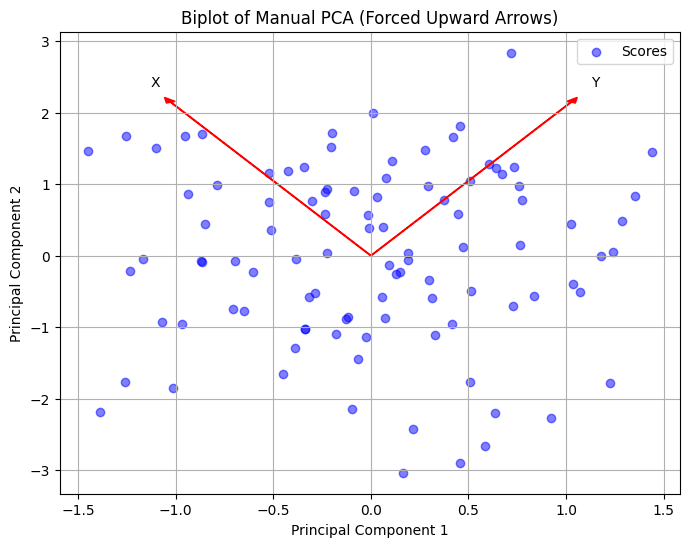

In [79]:
# 1,4,4

# 1) Force each eigenvector's y-component to be positive
if eigen_vecs_sorted[1, 0] < 0:
    eigen_vecs_sorted[:, 0] = -eigen_vecs_sorted[:, 0]
if eigen_vecs_sorted[1, 1] < 0:
    eigen_vecs_sorted[:, 1] = -eigen_vecs_sorted[:, 1]

# 2) Project the (standardized) data onto these flipped eigenvectors
scores_manual = np.dot(data_standardized, eigen_vecs_sorted)

# 4) Plot a biplot
plt.figure(figsize=(8, 6))
plt.scatter(scores_manual[:, 0], scores_manual[:, 1], c='b', alpha=0.5, label="Scores")

# Scale the arrows so they’re visible.
scalex = np.max(np.abs(scores_manual[:, 0]))
scaley = np.max(np.abs(scores_manual[:, 1]))

labels = ["X", "Y"]
for i in range(eigen_vecs_sorted.shape[0]):
    plt.arrow(0, 0,
              eigen_vecs_sorted[i, 0] * scalex,
              eigen_vecs_sorted[i, 1] * scaley,
              color='r', width=0.005, head_width=0.05)
    plt.text(eigen_vecs_sorted[i, 0] * scalex * 1.1,
             eigen_vecs_sorted[i, 1] * scaley * 1.1,
             labels[i], color='black')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Biplot of Manual PCA (Forced Upward Arrows)")
plt.legend()
plt.grid(True)
plt.show()


Now, when computing the principal components, we can see that it looks different then when we used the built-in PCA class. In the MATLAB example, we can see that it uses a function that flips the eigenvectors. I try to replicate that by also multiplying the eigenvectors by -1 which ensures that the arrows point upward. If i used the `np.fliplr(scores_manual)` function by itself it would point downward. This is probably because of how sklearn PCA class works under the hood and this is why it is different than when we used the PCA class.

Another reason why my this plot looks different is because of scaling. I did not use the `standardscaler` but i instead tried standardizing the data to the covariance matrix which is how i interpreted the example. However, under the hood, different libraries may scale data differently.

## 1.5. perform eigendecomposition step-by-step

In [80]:

# Define the 2x2 covariance matrix (from standardized data)
Cov = np.array([[1.0000, 0.5261365],
                [0.5261365, 1.0000]])
print("Covariance Matrix (Cov):")
print(Cov)

# 1.5.1 Compute Eigenvalues via the Characteristic Polynomial
a = 1.0
b = - (Cov[0, 0] + Cov[1, 1])
c = Cov[0, 0]*Cov[1, 1] - Cov[0, 1]*Cov[1, 0]
polynomial = [a, b, c]

eigenvalues = np.roots(polynomial)
eigenvalues_sorted = np.sort(eigenvalues)[::-1]
print("\nEigenvalues (sorted in descending order):")
print(np.round(eigenvalues_sorted, 7))

lambda1_val = eigenvalues_sorted[0]
lambda2_val = eigenvalues_sorted[1]

# Test the solutions:
lambda1_matrix = np.array([[lambda1_val, 0], [0, lambda1_val]])
Char1 = Cov - lambda1_matrix
det_Char1 = np.linalg.det(Char1)
print("\nFor lambda_1 = {:.7f}:".format(lambda1_val))
print("Cov - lambda_1*I =")
print(np.round(Char1, 7))
print("det(Cov - lambda_1*I) = {:.4e}".format(det_Char1))

lambda2_matrix = np.array([[lambda2_val, 0], [0, lambda2_val]])
Char2 = Cov - lambda2_matrix
det_Char2 = np.linalg.det(Char2)
print("\nFor lambda_2 = {:.7f}:".format(lambda2_val))
print("Cov - lambda_2*I =")
print(np.round(Char2, 7))
print("det(Cov - lambda_2*I) = {:.4e}".format(det_Char2))


# 1.5.2 Compute the Eigenvectors Using 
eigvals, eigvecs = np.linalg.eig(Cov)
# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigvals)[::-1]
eigvals_sorted = eigvals[sorted_indices]
eigvecs_sorted = eigvecs[:, sorted_indices]


v1 = eigvecs_sorted[:, 0].copy()
if v1[1] < 0:
    v1 = -v1


v2 = eigvecs_sorted[:, 1].copy()
if v2[0] > 0:
    v2 = -v2
if v2[1] < 0:
    v2 = -v2

loading_vector = np.column_stack((v1, v2))
print("\nFinal adjusted loading vectors (each column is an eigenvector):")
print(np.round(loading_vector, 4))


Covariance Matrix (Cov):
[[1.        0.5261365]
 [0.5261365 1.       ]]

Eigenvalues (sorted in descending order):
[1.5261365 0.4738635]

For lambda_1 = 1.5261365:
Cov - lambda_1*I =
[[-0.5261365  0.5261365]
 [ 0.5261365 -0.5261365]]
det(Cov - lambda_1*I) = 2.3365e-16

For lambda_2 = 0.4738635:
Cov - lambda_2*I =
[[0.5261365 0.5261365]
 [0.5261365 0.5261365]]
det(Cov - lambda_2*I) = 1.1683e-16

Final adjusted loading vectors (each column is an eigenvector):
[[ 0.7071 -0.7071]
 [ 0.7071  0.7071]]
